In [1]:
import json
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import csv
import networkx as nx
import itertools

In [2]:
%matplotlib inline

# 2019-08-28

#### Start loading files

In [3]:
with open("../links/Freilich09.json") as f:
    master_targets = json.load(f)

In [4]:
all_5w = list()
for fname in glob.glob("formatted/no_apparate_5w/*.json"):
    with open(fname) as f:
        all_5w.append(json.load(f))

In [5]:
all_5nw = list()
for fname in glob.glob("formatted/no_apparate_5nw/*.json"):
    with open(fname) as f:
        all_5nw.append(json.load(f))

In [6]:
all_10w = list()
for fname in glob.glob("formatted/no_apparate_10w/*.json"):
    with open(fname) as f:
        all_10w.append(json.load(f))

In [7]:
all_10nw = list()
for fname in glob.glob("formatted/no_apparate_10nw/*.json"):
    with open(fname) as f:
        all_10nw.append(json.load(f))

In [37]:
all_expansions = {"5w":all_5w,"5nw":all_5nw,"10w":all_10w,"10nw":all_10nw}

Look at disconnect between master targets and all scope targets (example)

In [38]:
assert len(all_5nw[0]['stats']['scope_targets'])==len(set(all_5nw[0]['stats']['scope_targets']))

In [39]:
missing_targets = set(master_targets)-set(all_5nw[0]['stats']['scope_targets'])

I should check if it's even possible to make these compounds with the set that John used.

In [40]:
with open("../../BioXP/kegg/2018-09-25/reaction_edges.json") as f:
    reaction_edges = json.load(f)

In [41]:
for k in reaction_edges.keys():
    for r in reaction_edges[k]:
        current_set = set(reaction_edges[k][r])
        if len(missing_targets&current_set)>0:
            print(k,r,current_set)

In [42]:
missing_targets

{'C05890', 'C05899'}

These are not possible to generate from the reaction_edges used!! This is why even though they are in the master Freilich set, they are not in the individual expansion scope_targets.

Let's check a little more robustly to see what the missing taget distribution is.

In [43]:
all_missing = dict()
for k in all_expansions:
    all_missing[k] = set()
    for run in all_expansions[k]:
        current_missing = set(master_targets)-set(run['stats']['scope_targets'])
        all_missing[k] = all_missing[k]|current_missing

In [44]:
all_missing

{'5w': {'C05890', 'C05899'},
 '5nw': {'C05890', 'C05899'},
 '10w': {'C05890', 'C05899'},
 '10nw': {'C05890', 'C05899'}}

Yep, so only those two compounds which don't even exist in the KEGG database anymore are missing.

In [49]:
targets_Freilich09 = ['C00001',
 'C00002',
 'C00003',
 'C00004',
 'C00005',
 'C00006',
 'C00008',
 'C00015',
 'C00016',
 'C00020',
 'C00024',
 'C00025',
 'C00035',
 'C00037',
 'C00041',
 'C00043',
 'C00044',
 'C00047',
 'C00049',
 'C00054',
 'C00055',
 'C00062',
 'C00063',
 'C00064',
 'C00065',
 'C00073',
 'C00075',
 'C00078',
 'C00079',
 'C00082',
 'C00097',
 'C00105',
 'C00112',
 'C00116',
 'C00123',
 'C00131',
 'C00135',
 'C00144',
 'C00148',
 'C00152',
 'C00183',
 'C00188',
 'C00234',
 'C00239',
 'C00249',
 'C00255',
 'C00286',
 'C00350',
 'C00360',
 'C00362',
 'C00364',
 'C00399',
 'C00407',
 'C00458',
 'C00459',
 'C00641',
 'C00748',
 'C01050',
 'C05764',
 'C05890',
 'C05894',
 'C05899',
 'C05980',
 'C06040',
 'C15672',
 'C16221']

#### What about the difference between the scope targets and what actually gets produced for each randomization?

Example of how to calculate for a single run:

In [45]:
max_gen = max([int(k) for k in all_5nw[0]['generations'].keys()])

In [46]:
set(all_5nw[0]['stats']['scope_targets']) & set(all_5nw[0]['generations'][str(max_gen)]['targets_cumulative'])

set()

In [48]:
len(set(all_5nw[0]['stats']['scope_targets']) - set(all_5nw[0]['generations'][str(max_gen)]['targets_cumulative']))

63

In [53]:
len(set(targets_Freilich09))

66

In [54]:
set(targets_Freilich09)-set(all_5nw[0]['stats']['scope_targets'])

{'C00001', 'C05890', 'C05899'}

> For some reason water isn't being included as a scope target even though it can presumabely be made with the starting compounds (or is included in the starting compounds)

In [65]:
[k for k in all_5nw[0]['stats']['scope_seeds']]

['C00283', 'C00469', 'C01438', 'C06548', 'C01548']

In [79]:
all_5w[0]['generations'][str(1)]

{'targets_new': [],
 'targets_cumulative': [],
 'compounds_cumulative': ['C00001', 'C00011', 'C00282', 'C06547', 'C00237'],
 'reactions_cumulative': ['R10092', 'R00067', 'R00132', 'R09784'],
 'compounds_new': ['C06547', 'C00282', 'C00237', 'C00011', 'C00001'],
 'reactions_new': ['R00132', 'R00067', 'R09784', 'R10092']}

In [80]:
list(range(1,5+1))

[1, 2, 3, 4, 5]

In [84]:
all_5w[0]['stats']['scope_seeds']

['C00001', 'C00011', 'C00282', 'C06547', 'C00237']

In [82]:
for gen in range(1,max_gen+1):
    new_compounds = all_5w[0]['generations'][str(gen)]["compounds_new"]
    if "C00001" in new_compounds:
        print(gen,new_compounds)

1 ['C06547', 'C00282', 'C00237', 'C00011', 'C00001']


In [83]:
set(targets_Freilich09)-set(all_5w[0]['stats']['scope_targets'])

{'C00001', 'C05890', 'C05899'}

Check all seeds to see if there are compounds besides water which are part of the seed and also part of the target set

In [88]:
[k for k in all_expansions]

['5w', '5nw', '10w', '10nw']

In [90]:
type(all_expansions["5w"])

list

In [114]:
targets_in_seeds_that_are_missing = list()
times_it_happens = 0
number_of_runs_that_dont_have_water_in_cumulative_compounds = 0
number_of_runs_that_that_have_water_in_seed = 0
number_of_runs_that_have_water_in_seed_but_not_cumulative_compounds = 0
for expansion_type in all_expansions:
    for run in all_expansions[expansion_type]:
        seeds = set(run['stats']['scope_seeds']) 
        targets_new = set(run['generations']["1"]['targets_new']) 
        targets_in_seeds_that_are_missing+=list((seeds-targets_new)&set(targets_Freilich09))
        max_gen = max([int(k) for k in run['generations'].keys()])
        if "C00001" not in run['generations'][str(max_gen)]['compounds_cumulative']:
            number_of_runs_that_dont_have_water_in_cumulative_compounds+=1
            if "C00001" in seeds:
                number_of_runs_that_have_water_in_seed_but_not_cumulative_compounds+=1
                
        if "C00001" in seeds:
                number_of_runs_that_that_have_water_in_seed+=1
        if len(targets_in_seeds_that_are_missing)>0:
            times_it_happens+=1
#         print(expansion_type,run,targets_in_seeds_that_are_missing)


In [115]:
number_of_runs_that_that_have_water_in_seed

2899

In [116]:
number_of_runs_that_dont_have_water

785

In [117]:
number_of_runs_that_have_water_in_seed_but_not_cumulative_compounds

0

In [105]:
set(targets_in_seeds_that_are_missing)

{'C00001'}

In [106]:
times_it_happens

4000

In [47]:
set(all_5nw[0]['stats']['scope_targets']) - set(all_5nw[0]['generations'][str(max_gen)]['targets_cumulative'])

{'C00002',
 'C00003',
 'C00004',
 'C00005',
 'C00006',
 'C00008',
 'C00015',
 'C00016',
 'C00020',
 'C00024',
 'C00025',
 'C00035',
 'C00037',
 'C00041',
 'C00043',
 'C00044',
 'C00047',
 'C00049',
 'C00054',
 'C00055',
 'C00062',
 'C00063',
 'C00064',
 'C00065',
 'C00073',
 'C00075',
 'C00078',
 'C00079',
 'C00082',
 'C00097',
 'C00105',
 'C00112',
 'C00116',
 'C00123',
 'C00131',
 'C00135',
 'C00144',
 'C00148',
 'C00152',
 'C00183',
 'C00188',
 'C00234',
 'C00239',
 'C00249',
 'C00255',
 'C00286',
 'C00350',
 'C00360',
 'C00362',
 'C00364',
 'C00399',
 'C00407',
 'C00458',
 'C00459',
 'C00641',
 'C00748',
 'C01050',
 'C05764',
 'C05894',
 'C05980',
 'C06040',
 'C15672',
 'C16221'}

Let's get for all runs:

In [18]:
all_unreached = dict()
for k in all_expansions:
    all_unreached[k] = list()
    for run in all_expansions[k]:
        max_gen = max([int(j) for j in run['generations'].keys()])
        current_unreached = set(run['stats']['scope_targets']) - set(run['generations'][str(max_gen)]['targets_cumulative'])
        all_unreached[k].append(list(current_unreached))

In [19]:
from collections import Counter

In [20]:
for k in all_unreached:
    print(k,len(Counter([i for outer in all_unreached[k] for i in outer])))

5w 63
5nw 63
10w 63
10nw 63


In [118]:
for k in all_unreached:
#     print([len(i) for i in k])
    print(k,Counter([len(i) for i in all_unreached[k]]))

5w Counter({63: 908, 48: 92})
5nw Counter({63: 943, 48: 43, 46: 8, 47: 6})
10w Counter({48: 982, 63: 15, 47: 2, 46: 1})
10nw Counter({63: 410, 48: 286, 46: 255, 47: 49})


Let's try to make a pretty plot of this

In [144]:
all_reached_for_plotting = dict()
for k in all_unreached:
    all_reached_for_plotting[k] = dict(Counter([len(i) for i in all_unreached[k]]))
    

In [145]:
all_reached_for_plotting_new = dict()
for outer_k in all_reached_for_plotting:
    all_reached_for_plotting_new[outer_k] = dict()
    for inner_k in all_reached_for_plotting[outer_k]:
        new_k = 63-inner_k
        all_reached_for_plotting_new[outer_k][new_k] = all_reached_for_plotting[outer_k][inner_k]

In [146]:
all_reached_for_plotting_new

{'5w': {0: 908, 15: 92},
 '5nw': {0: 943, 15: 43, 16: 6, 17: 8},
 '10w': {15: 982, 0: 15, 17: 1, 16: 2},
 '10nw': {0: 410, 17: 255, 15: 286, 16: 49}}

In [147]:
targets_df = pd.DataFrame(all_reached_for_plotting_new)

In [148]:
targets_df

,5w,5nw,10w,10nw
0,908.0,943,15,410
15,92.0,43,982,286
16,NaN,6,2,49
17,NaN,8,1,255


In [149]:
targets_df.T

,0,15,16,17
5w,908.0,92.0,NaN,NaN
5nw,943.0,43.0,6.0,8.0
10w,15.0,982.0,2.0,1.0
10nw,410.0,286.0,49.0,255.0


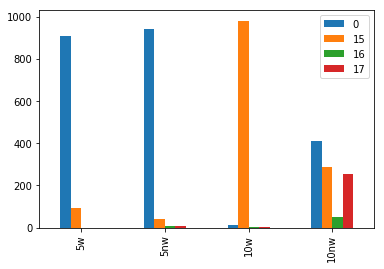

In [150]:
targets_df.T.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x32998de48>,
      dtype=object)

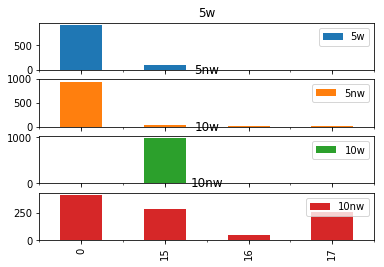

In [151]:
targets_df.plot.bar(subplots=True)

In [152]:
for i in range(1,15):
    for w in all_reached_for_plotting_new:
        all_reached_for_plotting_new[w][i] = 0

In [153]:
targets_filled_df = pd.DataFrame(all_reached_for_plotting_new)

In [154]:
targets_filled_df

,5w,5nw,10w,10nw
0,908.0,943,15,410
1,0.0,0,0,0
2,0.0,0,0,0
3,0.0,0,0,0
4,0.0,0,0,0
5,0.0,0,0,0
6,0.0,0,0,0
7,0.0,0,0,0
8,0.0,0,0,0
9,0.0,0,0,0


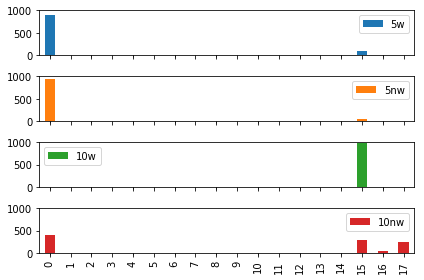

In [173]:
# plt.figure(figsize=(4,10))
targets_filled_df.plot.bar(subplots=True,title=['', '','',''],
                           ylim=(0,1000),
                           legend=True)
# plt.yscale('log')
plt.tight_layout()


All expansions miss Heme O and Siroheme. Weird that the expansions always have one of two outcomes. Makes me slightly suspicious?

In [22]:
Counter([i for outer in all_unreached['5w'] for i in outer])

Counter({'C00458': 1000,
         'C00082': 908,
         'C00234': 1000,
         'C00144': 1000,
         'C00006': 1000,
         'C00015': 1000,
         'C00016': 1000,
         'C15672': 1000,
         'C05764': 1000,
         'C00135': 908,
         'C00065': 908,
         'C00024': 1000,
         'C00097': 1000,
         'C00399': 1000,
         'C00035': 1000,
         'C00131': 1000,
         'C00459': 1000,
         'C00043': 1000,
         'C00020': 1000,
         'C00123': 1000,
         'C00044': 1000,
         'C00073': 1000,
         'C00286': 1000,
         'C05894': 1000,
         'C00183': 1000,
         'C00049': 908,
         'C00148': 908,
         'C00350': 1000,
         'C00008': 1000,
         'C00249': 1000,
         'C00239': 1000,
         'C00025': 908,
         'C06040': 1000,
         'C00055': 1000,
         'C01050': 1000,
         'C00748': 1000,
         'C00188': 908,
         'C00063': 1000,
         'C00105': 1000,
         'C00641': 1000,
       

In [23]:
Counter([i for outer in all_unreached['5nw'] for i in outer])

Counter({'C00458': 1000,
         'C00082': 943,
         'C00234': 1000,
         'C00144': 1000,
         'C00006': 1000,
         'C00015': 1000,
         'C00016': 1000,
         'C15672': 1000,
         'C05764': 1000,
         'C00135': 943,
         'C00065': 943,
         'C00024': 1000,
         'C00097': 986,
         'C00399': 1000,
         'C00035': 1000,
         'C00131': 1000,
         'C00459': 1000,
         'C00043': 1000,
         'C00020': 1000,
         'C00123': 1000,
         'C00044': 1000,
         'C00073': 992,
         'C00286': 1000,
         'C05894': 1000,
         'C00183': 1000,
         'C00049': 943,
         'C00148': 943,
         'C00350': 1000,
         'C00008': 1000,
         'C00249': 1000,
         'C00239': 1000,
         'C00025': 943,
         'C06040': 1000,
         'C00055': 1000,
         'C01050': 1000,
         'C00748': 1000,
         'C00188': 943,
         'C00063': 1000,
         'C00105': 1000,
         'C00641': 1000,
         

In [24]:
Counter([i for outer in all_unreached['10w'] for i in outer])

Counter({'C00458': 1000,
         'C00144': 1000,
         'C00234': 1000,
         'C00006': 1000,
         'C00015': 1000,
         'C00016': 1000,
         'C15672': 1000,
         'C05764': 1000,
         'C00024': 1000,
         'C00097': 997,
         'C00399': 1000,
         'C00035': 1000,
         'C00131': 1000,
         'C00459': 1000,
         'C00043': 1000,
         'C00020': 1000,
         'C00123': 1000,
         'C00044': 1000,
         'C00073': 999,
         'C00286': 1000,
         'C05894': 1000,
         'C00183': 1000,
         'C00350': 1000,
         'C00008': 1000,
         'C00249': 1000,
         'C00239': 1000,
         'C06040': 1000,
         'C00055': 1000,
         'C01050': 1000,
         'C00748': 1000,
         'C00063': 1000,
         'C00105': 1000,
         'C00641': 1000,
         'C00003': 1000,
         'C00004': 1000,
         'C00364': 1000,
         'C00360': 1000,
         'C00407': 1000,
         'C00255': 1000,
         'C00362': 1000,
  

In [25]:
Counter([i for outer in all_unreached['10nw'] for i in outer])

Counter({'C00458': 1000,
         'C00082': 410,
         'C00234': 1000,
         'C00144': 1000,
         'C00006': 1000,
         'C00015': 1000,
         'C00016': 1000,
         'C15672': 1000,
         'C05764': 1000,
         'C00135': 410,
         'C00065': 410,
         'C00024': 1000,
         'C00097': 696,
         'C00399': 1000,
         'C00035': 1000,
         'C00131': 1000,
         'C00459': 1000,
         'C00043': 1000,
         'C00020': 1000,
         'C00123': 1000,
         'C00044': 1000,
         'C00073': 745,
         'C00286': 1000,
         'C05894': 1000,
         'C00183': 1000,
         'C00049': 410,
         'C00148': 410,
         'C00350': 1000,
         'C00008': 1000,
         'C00249': 1000,
         'C00239': 1000,
         'C00025': 410,
         'C06040': 1000,
         'C00055': 1000,
         'C01050': 1000,
         'C00748': 1000,
         'C00188': 410,
         'C00063': 1000,
         'C00105': 1000,
         'C00641': 1000,
         

#### Look at number of unique seed sets

In [26]:
all_seeds = dict()
for k in all_expansions:
    all_seeds[k] = list()
    for run in all_expansions[k]:
        all_seeds[k].append(frozenset(run['stats']['scope_seeds']))

In [27]:
len(set(all_seeds['5w']))

119

In [28]:
len(all_seeds['5w'])

1000

So this means John allows the same seed set to be drawn more than once. I think that's good...

In [78]:
all_seeds['5nw']

[frozenset({'C00283', 'C00469', 'C01438', 'C01548', 'C06548'}),
 frozenset({'C00067', 'C00132', 'C00469', 'C06548', 'C11505'}),
 frozenset({'C00014', 'C00067', 'C00132', 'C00697', 'C01438'}),
 frozenset({'C00001', 'C00011', 'C00469', 'C00697', 'C06548'}),
 frozenset({'C00001', 'C00697', 'C01438', 'C06547', 'C11505'}),
 frozenset({'C00001', 'C00011', 'C00283', 'C01407', 'C06548'}),
 frozenset({'C00011', 'C00132', 'C00283', 'C00469', 'C00697'}),
 frozenset({'C00001', 'C00014', 'C00067', 'C00469', 'C06548'}),
 frozenset({'C00011', 'C00014', 'C00282', 'C00469', 'C01407'}),
 frozenset({'C00014', 'C00067', 'C00282', 'C00283', 'C01548'}),
 frozenset({'C00011', 'C01438', 'C01548', 'C06547', 'C20783'}),
 frozenset({'C00011', 'C00237', 'C00282', 'C00283', 'C06547'}),
 frozenset({'C00011', 'C00014', 'C00067', 'C01438', 'C20783'}),
 frozenset({'C00001', 'C00282', 'C00469', 'C01326', 'C01438'}),
 frozenset({'C00001', 'C00014', 'C00237', 'C00469', 'C06548'}),
 frozenset({'C00067', 'C00132', 'C00283'

In [29]:
all_10w[0]['stats']["scope_seeds"]

['C00001',
 'C01326',
 'C00014',
 'C00697',
 'C00011',
 'C00282',
 'C06547',
 'C00237',
 'C06548',
 'C01548']

In [30]:
all_10w[0]['generations'].keys()

dict_keys(['18', '2', '16', '11', '21', '7', '9', '25', '10', '26', '19', '17', '8', '22', '6', '24', '4', '3', '5', '20', '23', '13', '14', '27', '15', '12', '1'])

In [31]:
all_10w[0]['generations']['1']

{'targets_new': [],
 'targets_cumulative': [],
 'compounds_cumulative': ['C00001',
  'C01326',
  'C00014',
  'C00697',
  'C00011',
  'C00282',
  'C06547',
  'C00237',
  'C06548',
  'C01548'],
 'reactions_cumulative': ['R10092',
  'R00067',
  'R00132',
  'R05380',
  'R07316',
  'R10079',
  'R00005',
  'R00131',
  'R00153',
  'R05842',
  'R09784',
  'R00152',
  'R01408'],
 'compounds_new': ['C06547',
  'C00282',
  'C01326',
  'C00014',
  'C00237',
  'C00011',
  'C01548',
  'C00697',
  'C06548',
  'C00001'],
 'reactions_new': ['R10079',
  'R00067',
  'R10092',
  'R00131',
  'R00132',
  'R05380',
  'R01408',
  'R00005',
  'R07316',
  'R05842',
  'R09784',
  'R00153',
  'R00152']}

In [32]:
all_10w[0]['stats']["scope_compounds"]

['C01832',
 'C00016',
 'C00422',
 'C00001',
 'C17224',
 'C00024',
 'C15778',
 'C00005',
 'C00080',
 'C00007',
 'C20518',
 'C00028',
 'C02107',
 'C12176',
 'C00506',
 'C00026',
 'C01200',
 'C00009',
 'C00121',
 'C05966',
 'C16504',
 'C05432',
 'C00030',
 'C03826',
 'C05932',
 'C00003',
 'C06098',
 'C10138',
 'C00383',
 'C02091',
 'C00048',
 'C00982',
 'C12366',
 'C03944',
 'C00999',
 'C21529',
 'C11547',
 'C03798',
 'C20864',
 'C00035',
 'C05730',
 'C19938',
 'C18261',
 'C05694',
 'C00509',
 'C19943',
 'C00002',
 'C04071',
 'C01847',
 'C00019',
 'C00108',
 'C00029',
 'C06661',
 'C00138',
 'C15881',
 'C17324',
 'C03752',
 'C04261',
 'C07272',
 'C15485',
 'C03283',
 'C01326',
 'C00957',
 'C03049',
 'C01424',
 'C00132',
 'C01330',
 'C04488',
 'C03576',
 'C00448',
 'C01282',
 'C02798',
 'C00025',
 'C15935',
 'C00187',
 'C00004',
 'C00341',
 'C21643',
 'C10193',
 'C04530',
 'C21569',
 'C10502',
 'C15525',
 'C00008',
 'C16567',
 'C00006',
 'C00340',
 'C00704',
 'C00473',
 'C01885',
 'C01732',